In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from PIL import Image
%matplotlib inline

# read base image

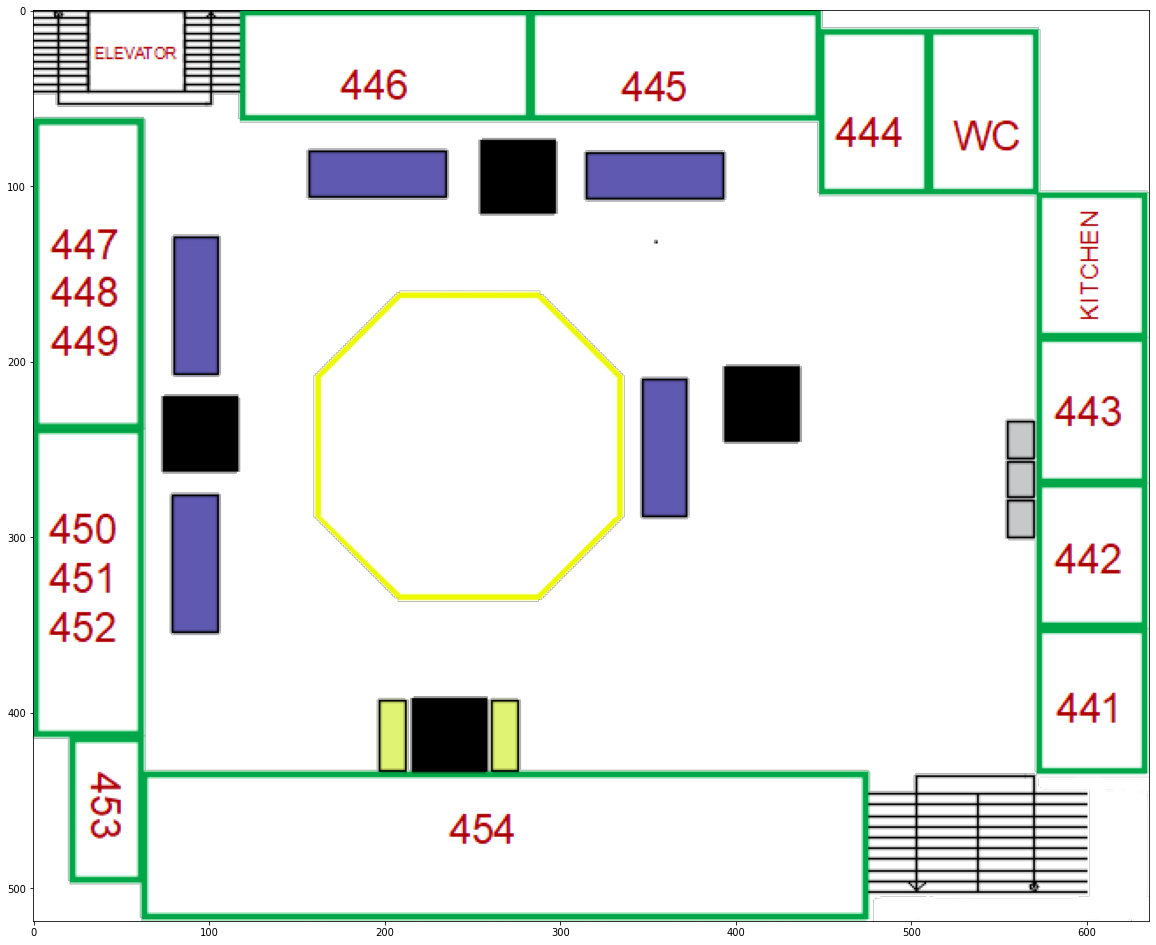

In [2]:
#image_filename = 'real_time_locations.png'
image_filename = 'floor_plan.png'
im = plt.imread(image_filename)
plt.figure(figsize=(20,20))
plt.imshow(im)

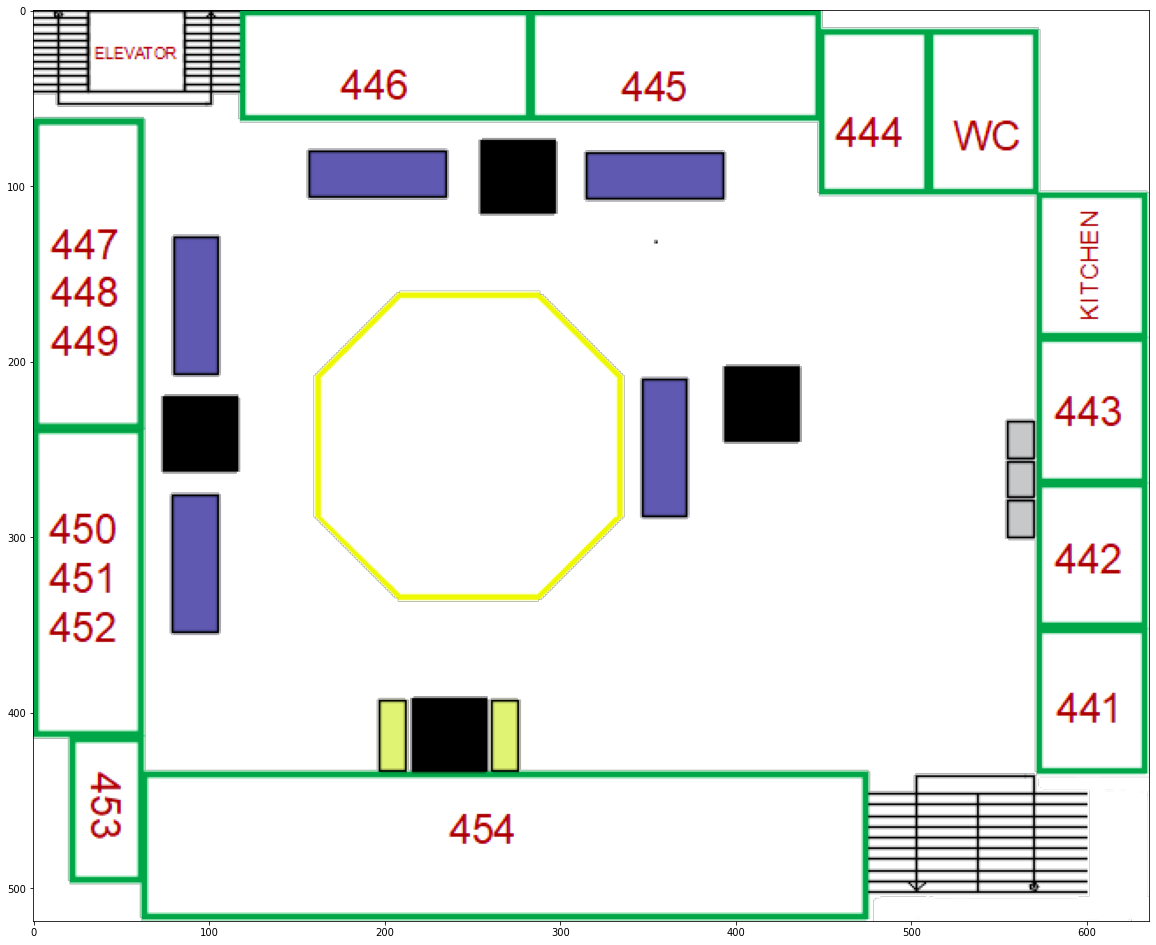

In [3]:
im = (im*255).astype('uint8')
plt.figure(figsize=(20,20))
plt.imshow(im)

In [4]:
im.shape

(519, 636, 4)

# create locations array

In [5]:
df1 = pd.read_csv('locs_new.csv').to_numpy()
#df1 = pd.read_csv('locs1.csv').to_numpy()
#df2 = pd.read_csv('locs2.csv').to_numpy()

In [6]:
locs = np.zeros((519,636))
for x,y in df1:
    locs[x][y] += 1
#for x,y in df2:
 #   locs[x][y] += 1

# create color map

In [7]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
colors = ["white", "yellow", "red"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

# heatmap #1

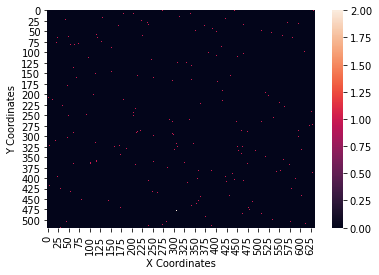

In [8]:
# Heatmap tutorial
# https://likegeeks.com/seaborn-heatmap-tutorial/
heatmap = sb.heatmap(locs)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

In [9]:
from scipy.ndimage.filters import gaussian_filter

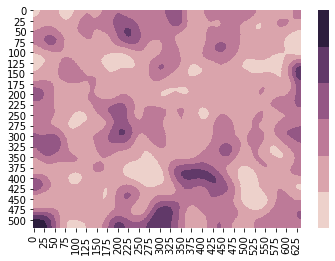

In [10]:
df3_smooth = gaussian_filter(locs, sigma=20)
cmap123 = sb.cubehelix_palette()
sb.heatmap(df3_smooth, vmin=np.min(df3_smooth), vmax=np.max(df3_smooth), cmap = cmap123 , cbar=True , cbar_kws={"ticks":[-40,150,-20,0,25,50,75,100,125]}) 

# heatmap #2

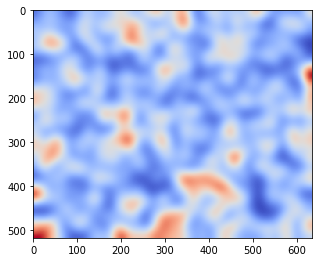

In [11]:
#from astropy.convolution import convolve
#from astropy.convolution.kernels import Gaussian1DKernel, Gaussian2DKernel
#plt.clf()
plt.figure(figsize=(5,5))

#hm = convolve(locs, Gaussian2DKernel(x_stddev=15))
hm = gaussian_filter(locs, sigma=16)
#plt.subplot(2,2,2)
plt.imshow(hm, cmap='coolwarm', interpolation='none')
#plt.colorbar()
#plt.title('Heatmap')
#plt.xlabel("X")
#plt.ylabel("Y")
#plt.gca().invert_xaxis()
plt.savefig("asdas.png")
plt.show()

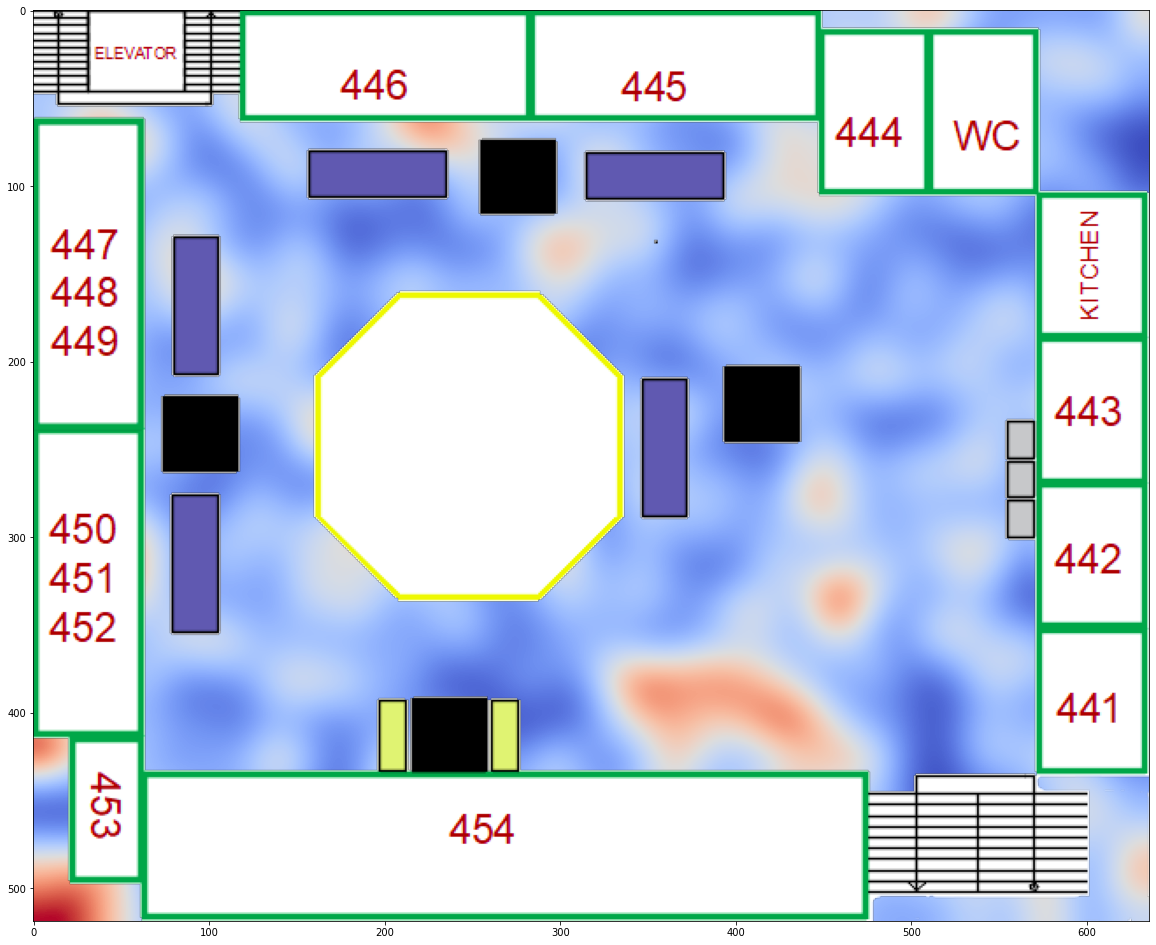

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(255 * hm, alpha=5, cmap='coolwarm')
plt.imshow(im)
plt.axis('on')
plt.savefig('heatmap.png')
plt.show()

# heatmap #3

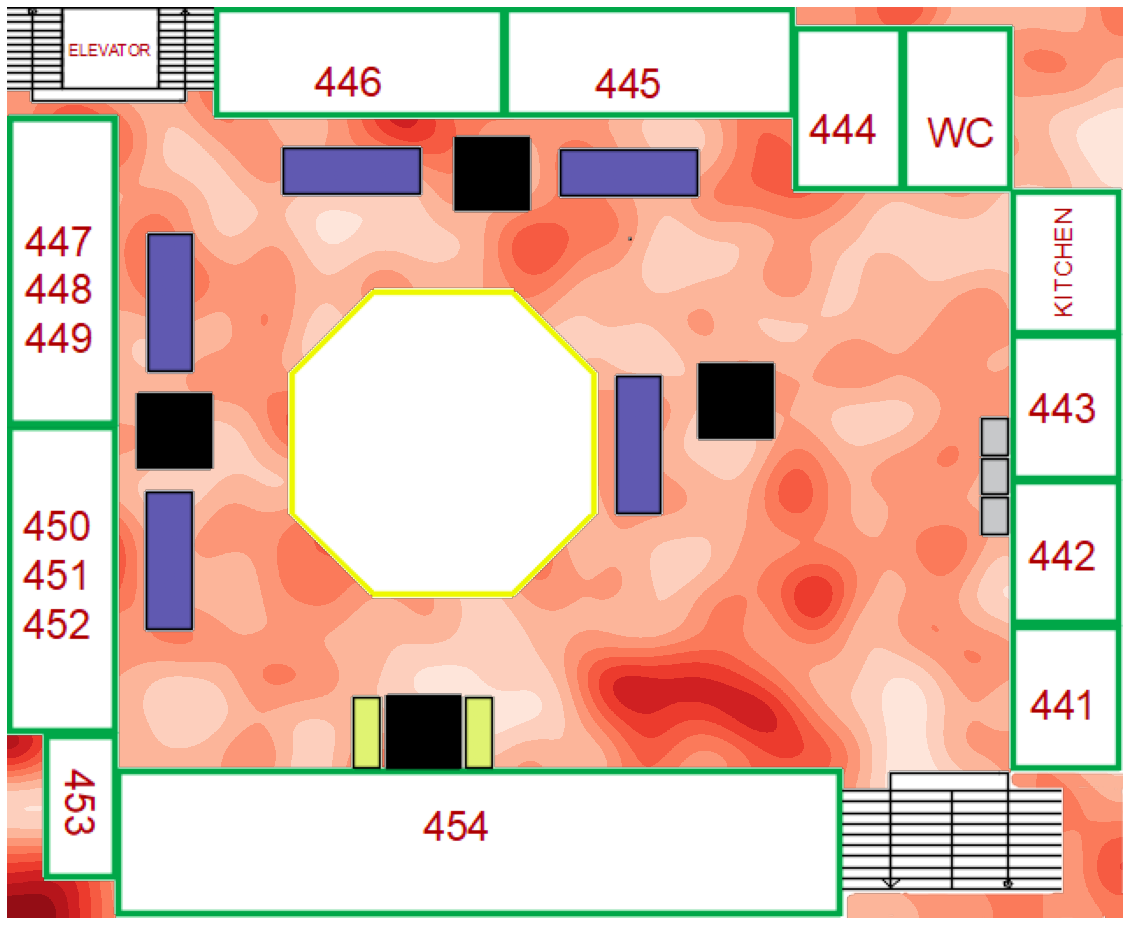

In [153]:
import numpy as np
image_filename = 'floor_plan.png'
im = plt.imread(image_filename)
cmap123 = sb.cubehelix_palette(rot=5, n_colors=8)
cmap123 = sb.color_palette(palette="Reds", n_colors=10)
cmap123 = ListedColormap(np.array(cmap123))
hm = gaussian_filter(locs, sigma=16)
plt.figure(figsize=(20,20))
plt.imshow(255 * hm, alpha=5, cmap=cmap123)
plt.imshow(im)
plt.axis('off')
plt.savefig('heatmap.png')
plt.show()

(480, 640, 4)


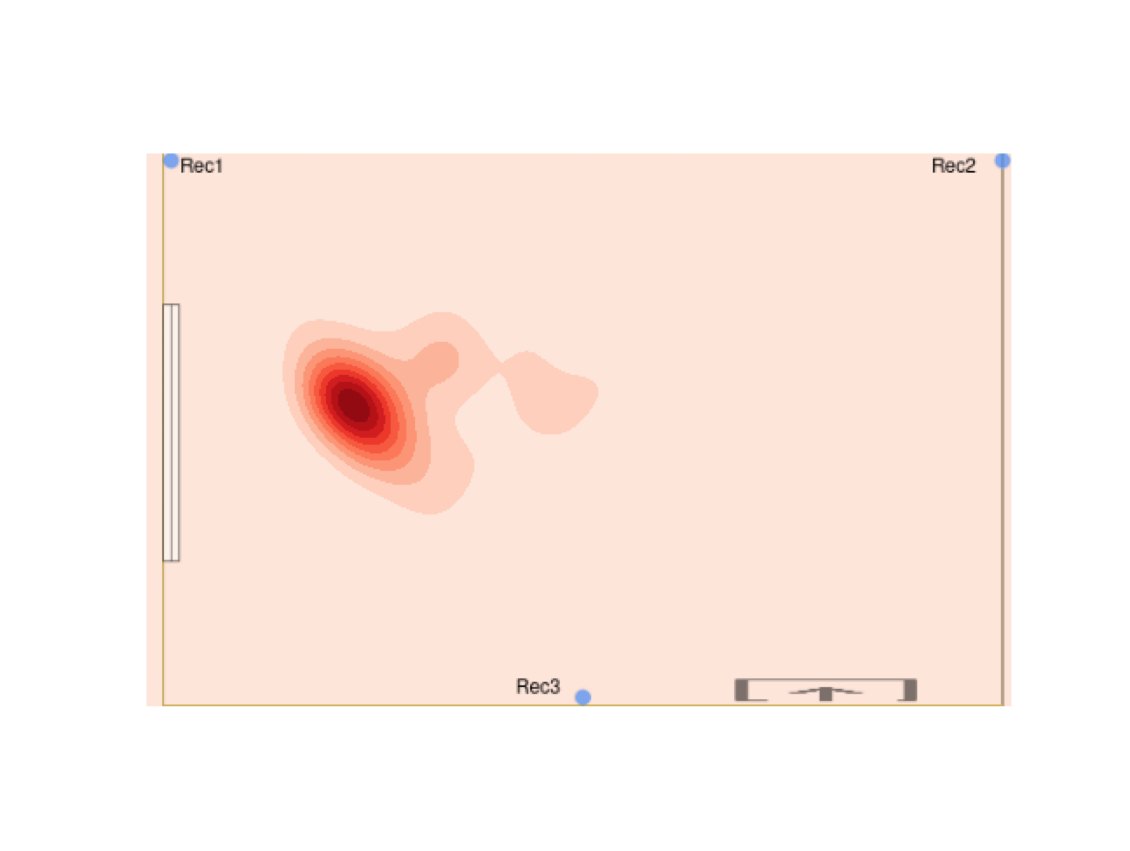

In [161]:
import requests
r = requests.get('https://t7ftvwr8bi.execute-api.eu-central-1.amazonaws.com/cors/position/heatmap?\
startTime="2020-4-9 10:10:10"&endTime="2020-6-13 20:20:20"')
import base64
from io import BytesIO
im = plt.imread(BytesIO(base64.b64decode(r.content)))
print(im.shape)
plt.figure(figsize=(20,16))
plt.axis("off")
plt.imshow(im)

(480, 640, 4)


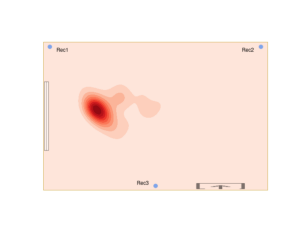

In [175]:
import requests
r = requests.get('https://t7ftvwr8bi.execute-api.eu-central-1.amazonaws.com/cors/position/heatmap?\
startTime="2020-4-9 10:10:10"&endTime="2020-6-13 20:20:20"')
import base64
from io import BytesIO
im = plt.imread(BytesIO(base64.b64decode(r.content)))
print(im.shape)
plt.axis("off")
plt.imshow(im)
plt.savefig("heatmap.png")

In [176]:
data = {
        1: [0.5, 3.4],
        2: [3.4, 2.2],
        3: [5.2, 3.2],
        4: [3.4, 2.2],
        5: [0, 0],
        6: [0, 0],
        7: [0, 1],
        8: [0, 1.5],
        9: [0, 2],
        10: [0, 1.25],
       }

X ratio =  100.0
Y ratio =  100.0


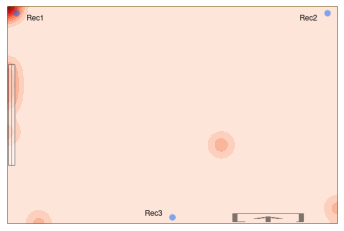

In [194]:
# read image and calculate real distance - image ratios
im = plt.imread("floor-plan.png")
y, x = im.shape[0]-1, im.shape[1]-1  # 0 indexed
y_real, x_real = 3.45, 5.25
x_ratio, y_ratio = x/x_real, y/y_real
print("X ratio = ", x_ratio)
print("Y ratio = ", y_ratio)

# create heatmap matrix
heatmap = np.zeros((im.shape[0], im.shape[1]))

# fill heatmap matrix
for key, val in data.items():
    heatmap[round(val[1]*y_ratio)] [round(val[0]*x_ratio)] += 1

cmap = [[0.99717032, 0.90136101, 0.85628604],
        [0.99260285, 0.81413303, 0.73837755],
        [0.98823529, 0.70685121, 0.60101499],
        [0.98823529, 0.58579008, 0.4622376 ],
        [0.98572857, 0.47227989, 0.3467897 ],
        [0.96733564, 0.34918877, 0.24775087],
        [0.9256286,  0.2200692,  0.16770473],
        [0.81933103, 0.11672434, 0.12341407],
        [0.71309496, 0.07446367, 0.09625529],
        [0.57936178, 0.04244521, 0.07361784]]
cmap = ListedColormap(cmap)

# apply gaussian filter
hm = gaussian_filter(heatmap, sigma=16).reshape(im.shape[0], im.shape[1])

# create final image
plt.imshow(255 * hm, alpha=5, cmap=cmap)
plt.imshow(im)
plt.axis("off")
plt.show()